Importing Libraries

In [1]:
# Importing Libraries
from tensorflow.keras.utils import to_categorical #converts integer to binary matrics 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential #TO build CNN model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D 
from sklearn.preprocessing import LabelEncoder #Convert string labels into numerical labels
from tqdm.notebook import tqdm #adds a progress bar for loops 
import matplotlib.pyplot as plt # for data visualization 
import os # to interaction with operating system 
import pandas as pd #For data manipulation and analysis 
import numpy as np #Numerical computaion library for handling arrays and matrics 

Defining Global Variables

In [2]:
# Global Variables
IMG_SIZE = 48  
BATCH_SIZE = 64  
TRAIN_DIR = 'images/train' 

Function to Count Images per Class

In [3]:
def count_exp(path, set_): #Function to count the number of images in each expression
    dict_ = {}
    for expression in os.listdir(path): #List all the files in the directory
        dir_ = os.path.join(path, expression)  #Join the path with the expression
        dict_[expression] = len(os.listdir(dir_)) #Count the number of files in the directory
    df = pd.DataFrame(dict_, index=[set_]) #Create a dataframe with the dictionary
    return df 

train_count = count_exp(TRAIN_DIR, 'train') #Count the number of images in the training set
print("Training Data Distribution:\n", train_count) #Print the training data distribution


Training Data Distribution:
        angry  disgust  fear  happy  neutral  sad  surprise
train    705      695   703    710      692  706       694


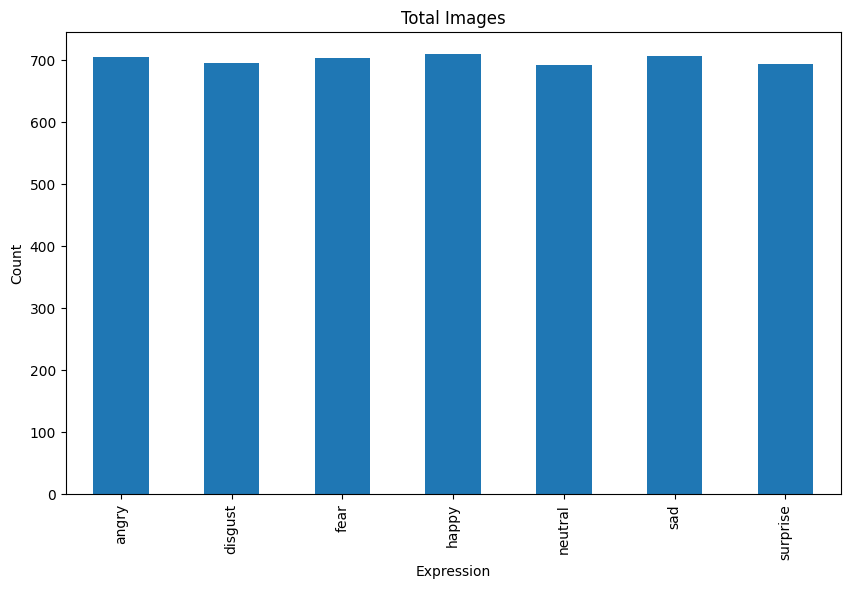

In [4]:
# Visualize training data distribution
train_count.transpose().plot(kind='bar', figsize=(10, 6), legend=False)  #Plot the training data distribution
plt.title('Total Images') #Set the title of the plot
plt.ylabel('Count') #Set the y-axis label
plt.xlabel('Expression') #Set the x-axis label
plt.show() #Display the plot

Creating Dataframe from Image Directory

In [5]:
def createdataframe(dir): #Function to create a dataframe of image paths and labels   
    image_paths = [] 
    labels = []
    for label in os.listdir(dir): # List all the files in the directory
        for imagename in os.listdir(os.path.join(dir,label)): 
            image_paths.append(os.path.join(dir,label,imagename)) #Append the image path to the list
            labels.append(label) #Append the label to the list
        print(label, "completed") #Print the label name after all the images of that label are appended
    return image_paths,labels


In [6]:
train = pd.DataFrame() 
train['image'], train['label'] = createdataframe(TRAIN_DIR) #Create a dataframe of image paths and labels
print(train) 

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                              image     label
0          images/train\angry\0.JPG     angry
1          images/train\angry\1.JPG     angry
2         images/train\angry\10.jpg     angry
3        images/train\angry\100.JPG     angry
4        images/train\angry\101.JPG     angry
...                             ...       ...
4900   images/train\surprise\97.JPG  surprise
4901   images/train\surprise\98.JPG  surprise
4902   images/train\surprise\99.JPG  surprise
4903  images/train\surprise\r10.jpg  surprise
4904  images/train\surprise\r11.jpg  surprise

[4905 rows x 2 columns]


Creating Image Data Generators

In [ ]:
# Data Augmentation & Preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values between 0 and 1
    rotation_range=30,            # Randomly rotate images up to 30 degrees
    width_shift_range=0.2,        # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,       # Randomly shift images vertically by 20% of the height
    shear_range=0.2,              # Apply random shearing transformations
    zoom_range=0.3,               # Randomly zoom into images up to 30%
    horizontal_flip=True,         # Randomly flip images horizontally
    vertical_flip=True,          # Do not flip images vertically (usually not needed for most datasets)
    fill_mode='nearest',          # Fill any empty pixels after transformation using the nearest strategy
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness
    validation_split=0.2          # Reserve 20% of the data for validation
)

# Validation Data Generator (Simpler, usually no augmentations except rescaling)
validation_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize pixel values between 0 and 1
)


#Creating the Data Generators for trainning and validation data
# Train Data Generator
train_generator = train_datagen.flow_from_directory(
    directory=TRAIN_DIR, # Specify the directory
    target_size=(IMG_SIZE, IMG_SIZE), # Specify the target size of the images
    batch_size=BATCH_SIZE, 
    class_mode='categorical', 
    subset='training',  
    shuffle=True 
)

# Validation Data Generator
validation_generator = train_datagen.flow_from_directory(   # Create a validation data generator
    directory=TRAIN_DIR,    # Specify the directory
    target_size=(IMG_SIZE, IMG_SIZE),   # Specify the target size of the images
    batch_size=BATCH_SIZE,  # Specify the batch size
    class_mode='categorical',   # Specify the class mode as categorical
    subset='validation',    # Specify the subset as validation
    shuffle=True    # Shuffle the data
)

Found 3926 images belonging to 7 classes.
Found 979 images belonging to 7 classes.


In [8]:
# Get the total number of classes
total_classes = len(train_generator.class_indices)
print(f"Total number of classes in the dataset: {total_classes}")

# Get the number of images in the training dataset
train_samples = train_generator.samples
print(f"Total number of images in the training set: {train_samples}")

# Get the number of images in the validation dataset
valid_samples = validation_generator.samples
print(f"Total number of images in the validation set: {valid_samples}")

# Calculate the total number of images in the dataset
total_samples = train_samples + valid_samples
print(f"Total number of images in the dataset: {total_samples}")


Total number of classes in the dataset: 7
Total number of images in the training set: 3926
Total number of images in the validation set: 979
Total number of images in the dataset: 4905


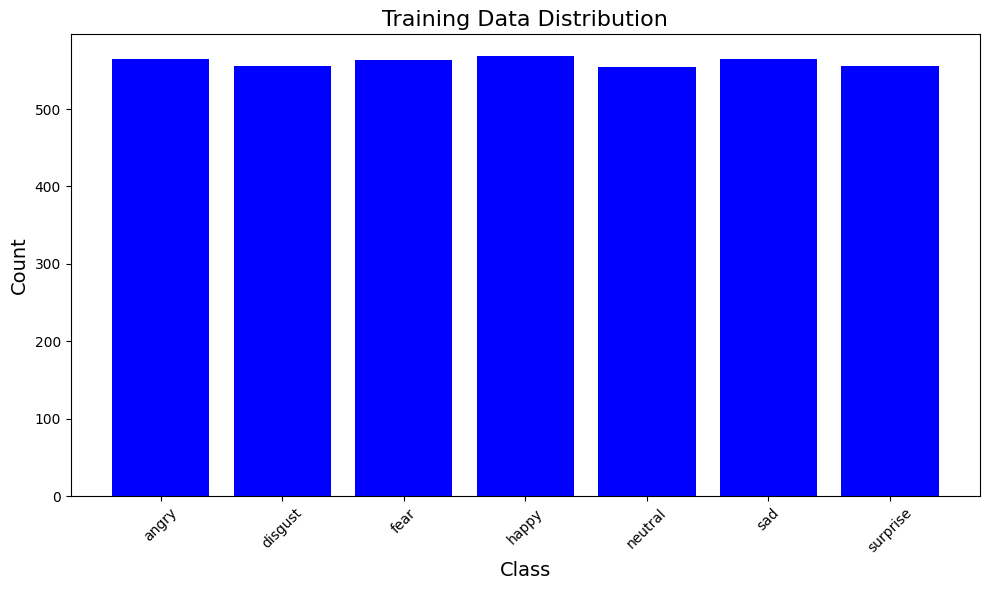

In [10]:
# Create a bar plot for training data distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='blue')
plt.title('Training Data Distribution', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Get the class distribution from the validation generator
validation_classes = validation_generator.classes  
class_indices = validation_generator.class_indices  
class_names = {v: k for k, v in class_indices.items()}  

# Count the occurrences of each class
class_counts = dict(zip(class_names.values(), [0] * len(class_names))) 
for cls in validation_classes: 
    class_counts[class_names[cls]] += 1 

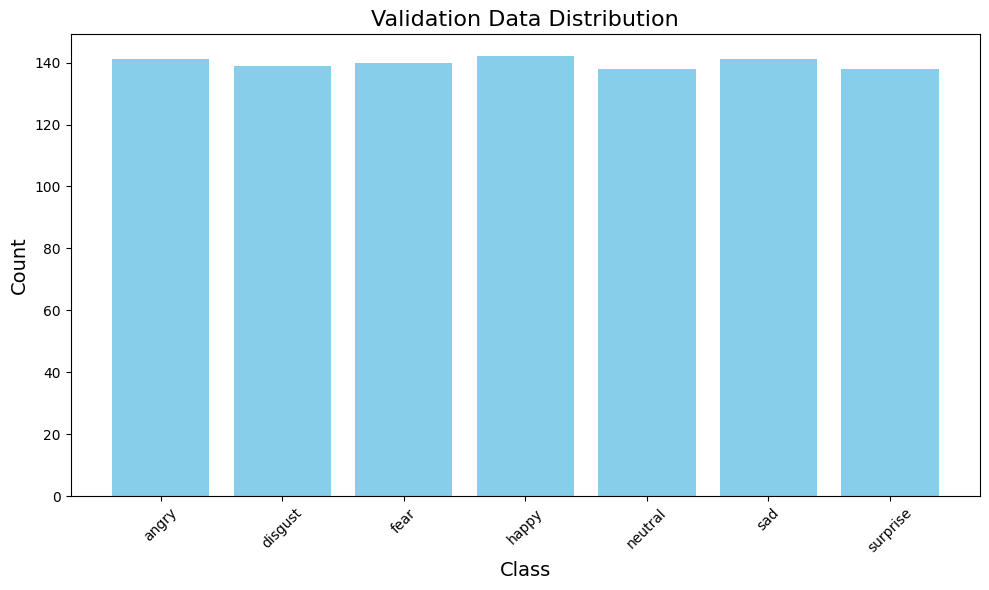

In [12]:
# Create a bar plot for validation data distribution
plt.figure(figsize=(10, 6)) 
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Validation Data Distribution', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Class', fontsize=14) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Extracting Features (Converting Images to NumPy Arrays)

In [ ]:
#These functions load images, resize them to (48, 48), convert them to grayscale, and normalize them.
# Extracting Features for CNN Input
def extract_features(images): 
    features = [] 
    for image in tqdm(images):
        img = load_img(image, 
        color_mode='grayscale', 
        target_size=(48, 48))  
        img = np.array(img)     
        features.append(img)
    features = np.array(features)  
    features = features.reshape(len(features), 48, 48, 1)  
    return features

In [ ]:
train_features = extract_features(train['image'])  

  0%|          | 0/4905 [00:00<?, ?it/s]

In [15]:
# Extracting Features for Validation Set (Using ImageDataGenerator Subset)
def extract_features_for_validation(generator):
    features = []
    for image in tqdm(generator.filepaths): # Iterate through the file paths in the generator
        img = load_img(image,  
                       color_mode='grayscale',  # Load the image in grayscale
                       target_size=(48, 48))  # Resize to 48x48
        img = np.array(img)     # Converts the PIL image to a NumPy array for numerical processing
        features.append(img)
    features = np.array(features)  # Converts the list of processed images into a single 3D NumPy array
    features = features.reshape(len(features), 48, 48, 1)  # Reshape for CNN input
    return features


In [16]:
# Validation Generator for feature extraction
validation_features = extract_features_for_validation(validation_generator)

  0%|          | 0/979 [00:00<?, ?it/s]

Data Normalization and Label Encoding

In [17]:
# Normalizing Image Data for Neural Network
x_train = train_features / 255.0    # Normalize training features
x_validation = validation_features / 255.0    # Normalize validation features

Encoding Labels (Converting Text Labels to One-Hot Encoding)

In [ ]:
le = LabelEncoder() 
le.fit(train['label'])

LabelEncoder()

In [19]:
# Transform training labels to numeric
y_train = le.transform(train['label'])  # string to numerical

# Extract labels from validation_generator for validation data
validation_labels = validation_generator.classes  # These are the numeric labels from validation set

# Transform validation labels to numeric (they should already be numeric, but we do it for consistency)
y_validation = validation_labels  # In this case, they are already in numeric form


In [20]:
# Converting Numerical Labels to One-Hot Encoding for Training and Validation
y_train = to_categorical(y_train, num_classes=7)  # Convert training labels to one-hot encoding
y_validation = to_categorical(y_validation, num_classes=7)  # Convert validation labels to one-hot encoding

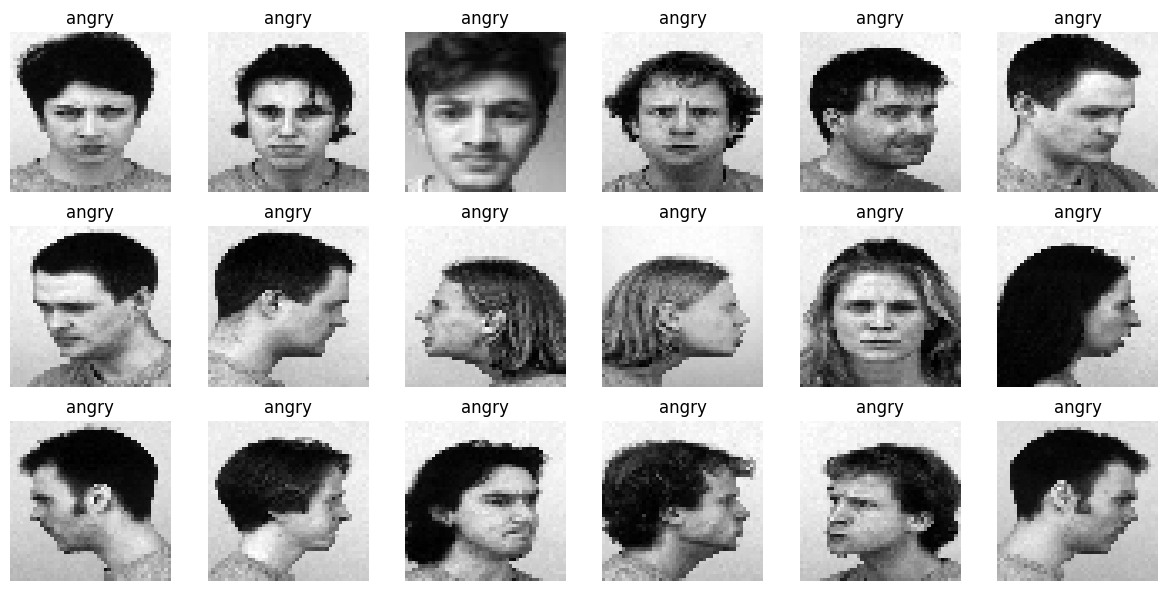

In [27]:
import matplotlib.pyplot as plt

# Function to plot preprocessed images
def plot_preprocessed_images(images, labels, class_names, num_samples=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(3, 6, i + 1)
        plt.imshow(images[i].reshape(48, 48), cmap='gray')  # Show the preprocessed image
        plt.title(class_names[np.argmax(labels[i])])  # Get class name from one-hot encoded labels
        plt.axis('off')  # Hide axis
    plt.tight_layout()
    plt.show()

# Plot preprocessed training images
plot_preprocessed_images(x_train, y_train, le.classes_, num_samples=18)


Defining the CNN Model

In [24]:
# Build CNN model using Sequential
model = Sequential([
    Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),  # First Conv2D layer specifies input shape
    MaxPooling2D(pool_size=(2, 2)), # MaxPooling layer to downsample the image representation
    Dropout(0.4), # Regularization technique to prevent overfitting

    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  
    Dropout(0.4), 

    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4), 

    Flatten(), # Flatten the 2D arrays for fully connected layers
    Dense(512, activation='relu'), 
    Dropout(0.4), # Regularization technique to prevent overfitting
    Dense(256, activation='relu'),  # Hidden layer
    Dropout(0.3), 
    Dense(7, activation='softmax')  # Output layer 
])


C:\Users\ACER\python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #compiling the model #Adaptive Moment Estimation

Training the Model

In [23]:
# Training the Model with Training and Validation Data
history = model.fit(
    x=x_train,                          # Training data
    y=y_train,                          # Training labels
    batch_size=128,                     # Batch size Number of samples trained at once before updating weights.
    epochs=80,                          # Number of epochs
    validation_data=(x_validation, y_validation)  # Validation data (using validation set)
)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.1399 - loss: 1.9584 - val_accuracy: 0.1590 - val_loss: 1.9434
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.1585 - loss: 1.9346 - val_accuracy: 0.1538 - val_loss: 1.9415
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.1688 - loss: 1.9310 - val_accuracy: 0.1364 - val_loss: 1.9463
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.1717 - loss: 1.9313 - val_accuracy: 0.1651 - val_loss: 1.9401
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.1821 - loss: 1.9201 - val_accuracy: 0.1662 - val_loss: 1.9357
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.1776 - loss: 1.9201 - val_accuracy: 0.1959 - val_loss: 1.9251
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 59s 889ms/step - accuracy: 0.2038 - loss: 1.9026 - val_accuracy: 0.2277 - val_loss: 1.8794
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.2364 - loss: 1.8491 - val_accuracy: 0.2462 - val_lo

Plotting Training and Validation Metrics

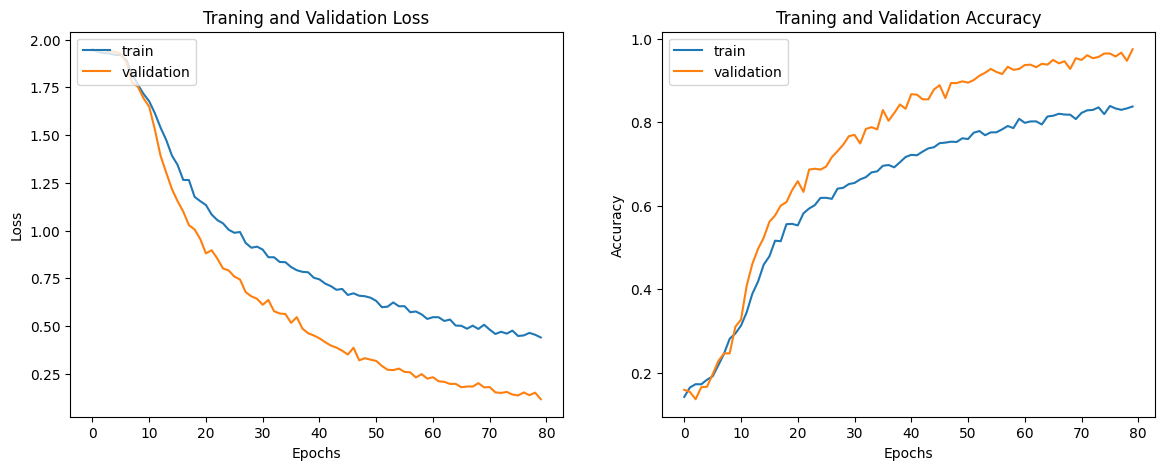

In [24]:
# Model Training and Evaluation Visualization
plt.figure(figsize=(14,5))

# Plotting the Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Traning and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper left')  # Corrected 'test' to 'validation'

# Plotting the Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Traning and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')  # Corrected 'test' to 'validation'

plt.show()


Saving the Model

In [27]:
# Save the model
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
    
    model.save ("emotiondetector.h5")

PermissionError: [Errno 13] Permission denied: 'C:\\emotiondetector.json'

Evaluating the Model with a Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step


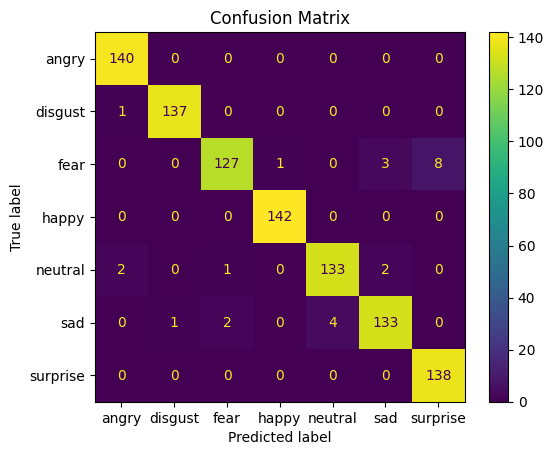

In [27]:
# Predicting on the validation set
y_pred = model.predict(x_validation)

# Convert predictions from one-hot encoding to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoding to class indices
y_true_classes = np.argmax(y_validation, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

In [78]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1 = f1_score(y_true_classes, y_pred_classes, average=None)

# Get class labels
class_labels = le.classes_

# Create a DataFrame to store the results
results = pd.DataFrame({
    "Class": class_labels,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

# Compute the macro-average F1 score
f1_macro = f1_score(y_true_classes, y_pred_classes, average='macro')

# Add a row for the macro-average
results.loc[len(results.index)] = ["Macro-average", "-", "-", f1_macro]

# Display the table
print(results)


           Class Precision    Recall  F1 Score
0          angry  0.979021       1.0  0.989399
1        disgust  0.992754  0.992754  0.992754
2           fear  0.976923  0.913669  0.944238
3          happy  0.993007       1.0  0.996491
4        neutral  0.970803  0.963768  0.967273
5            sad  0.963768      0.95  0.956835
6       surprise  0.945205       1.0  0.971831
7  Macro-average         -         -  0.974117


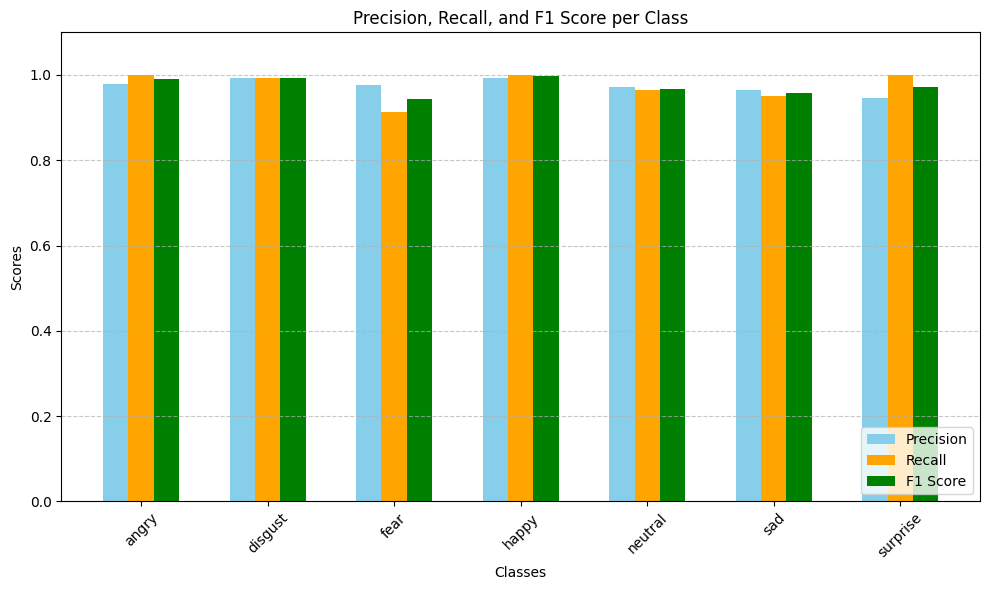

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Class labels
class_labels = le.classes_

# Plotting data
x = np.arange(len(class_labels))  # Indices for class labels
width = 0.2  # Width of the bars

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='orange')
plt.bar(x + width, f1, width, label='F1 Score', color='green')

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score per Class')
plt.xticks(x, class_labels, rotation=45)
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Final Prediction on a Sample Image

In [8]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Load the trained model
model = load_model("emotiiondetector.h5", compile=False)

Original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Model prediction is: sad


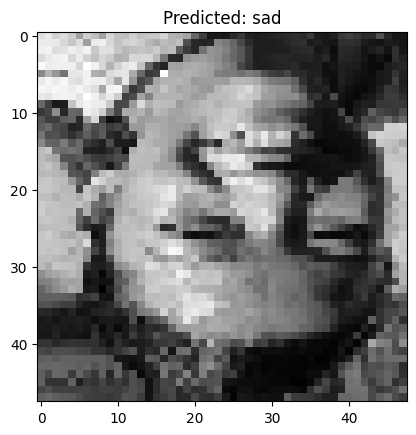

In [10]:
# Label for prediction
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def ef(image):  # Extract feature for prediction
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))  # Use color_mode='grayscale'
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)  # Reshape for CNN input
    feature = feature / 255.0  # Normalize the image (same as training preprocessing)
    return feature

image = 'images/train/happy/anumaamr.jpg'
print("Original image is of happy")

img = ef(image)
pred = model.predict(img)       # Make prediction using the loaded model
pred_label = label[pred.argmax()]  # Get the label with the highest probability
print("Model prediction is:", pred_label)

plt.imshow(img.reshape(48, 48), cmap='gray')  # Show the image
plt.title(f"Predicted: {pred_label}")
plt.show()